In [0]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [0]:
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
reverse_word_index = dict( (value, key) for (key, value) in word_index.items())


In [0]:
print(train_data[0])
print(train_labels)

print(train_data.dtype)
print(train_labels[0].dtype)



[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 ... 0 1 0]
object
int64


In [0]:
#decode the train_data
decoded_review = ' '.join([reverse_word_index.get(i) for i in train_data[0]])
print(decoded_review)

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

In [0]:
# we will pass train_data[0] to sequence
def vectorize_sequence(sequences, dimensions = 10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
print(len(x_train))
y_train = np.array(train_labels).astype('float32')
print(y_train)
y_test = vectorize_sequence(test_labels)

#get the first 10000 rows
x_val = x_train[:10000]
# get another 10000 rows
partial_x_val = x_train[10000:]

#same goes here
y_val = y_train[:10000]
partial_y_val = y_train[10000:]



25000
[1. 0. 0. ... 0. 1. 0.]


In [0]:
# keras implementation
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,) ))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(optimizer="rmsprop", loss = "binary_crossentropy", metrics = ['accuracy'])
history = model.fit(
    partial_x_val, #training data
    partial_y_val, #training label
    epochs=20, 
    batch_size = 512, #mini-batches = 512
    validation_data=(x_val, y_val)) #monitor loss and accuracy on the 10,000 samples that you set apart



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 273us/step - loss: 0.8426 - acc: 0.6813 - val_loss: 0.4237 - val_acc: 0.8175
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3683 - acc: 0.8462 - val_loss: 0.4431 - val_acc: 0.8469
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2816 - acc: 0.8475 - val_loss: 0.4817 - val_acc: 0.7824
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.2272 - acc: 0.8291 - val_loss: 0.5931 - val_acc: 0.7897
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1784 - acc: 0.8216 - val_loss: 0.5900 - val_acc: 0.7525
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1512 - acc: 0.7988 - val_loss: 0.7155 - val_acc: 0.7089
Ep

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


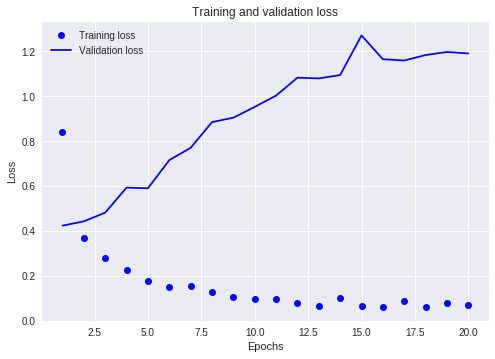

In [0]:
history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

acc = history_dict.get('acc')
epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


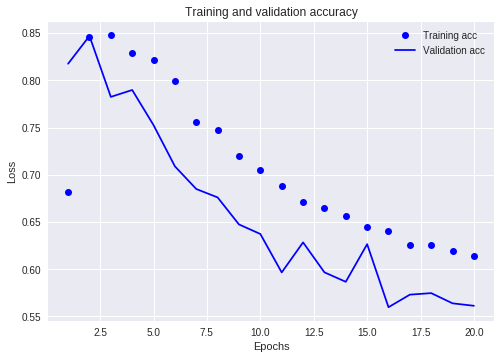

In [0]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()